# Data Cleaning

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from collections import Counter
import calendar
%matplotlib inline

mil = 1000000
bil = 1000000000

pwd = '/Users/annadangela/Flatiron/mod01/mod1-phase-1-project-online/unzippedData/'

In [88]:
# Opened all files
# Determined 4 (of 11) files contain information needed for this analysis

## Explore Studio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


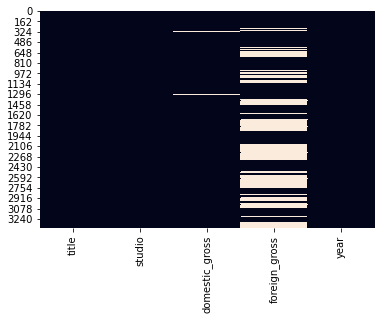

In [89]:
# o	Contains the actual movie titles for popular movies, the year of release, the studios who released them, 
# and the amount of money they grossed domestically and abroad
######what I want: title, studio, 
studio = pd.read_csv(pwd+'bom.movie_gross.csv')
studio.info()
studio.head()
studio.isna().mean() 
sns.heatmap(studio.isnull(), cbar=False); # examined NaN values


In [90]:
# check for duplicates, no duplicates
studio[studio.duplicated(subset='title', keep=False)].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [91]:
# missing 39.9% of foreign_gross, !!!!!!!drop column!!!!!!!
# investigate domestic competitotors
studio = studio.drop('foreign_gross', axis=1)

In [92]:
# Number of studios repped
len(studio)

3387

In [93]:
#2010 - 2018, 9 years
studio['year'].min(), studio['year'].max() 

(2010, 2018)

In [94]:
len(studio['studio'].unique()) # 258, with 5 missing pts

258

In [95]:
# top 6 grossing: BV, Uni, WB, Fox, Sony, Par.
studio.groupby('studio').agg({'domestic_gross': 'sum','title': 'count'}).sort_values('domestic_gross', ascending=False).head(10)


,domestic_gross,title
studio,,
BV,1.841903e+10,106
Uni.,1.290239e+10,147
WB,1.216805e+10,140
Fox,1.094950e+10,136
Sony,8.459683e+09,110
Par.,7.685871e+09,101
LGF,4.118963e+09,103
WB (NL),3.995700e+09,45
LG/S,2.078200e+09,41


In [96]:
# total studio dom_gross in USD for top 10 grossing studios
sum(list(studio.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10).values)) 

82460285390.0

In [97]:
# total gross across set
studio.domestic_gross.sum()

96557293580.0

In [98]:
# how much revenue is held by the top 10 studios
sum(list(studio.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10).values)) / studio.domestic_gross.sum()

0.8540036938968231

In [99]:
# tile count for those ten studios
sum(list(studio.groupby('studio').agg({'title': 'count'}).sort_values('title', ascending=False).head(10).values)) 

array([1268])

In [100]:
# let's investigate the top studios more closely
# refocus on studios making bringing in greater than 10 billion
studio_sum = studio.groupby('studio').agg({'domestic_gross': 'sum', 'title': 'count', 'year': 'nunique'})
studio_sum['dom_gross_mil'] = studio_sum['domestic_gross'] / mil
studio_sum['dom_gross_bil'] = studio_sum['domestic_gross'] / bil
studio_sum = studio_sum[['domestic_gross', 'dom_gross_mil', 'dom_gross_bil', 'title', 'year']]
studio_sum.sort_values('dom_gross_mil', ascending=False).head(4)

,domestic_gross,dom_gross_mil,dom_gross_bil,title,year
studio,,,,,
BV,1.841903e+10,18419.029199,18.419029,106,9
Uni.,1.290239e+10,12902.393000,12.902393,147,9
WB,1.216805e+10,12168.046000,12.168046,140,9
Fox,1.094950e+10,10949.499997,10.949500,136,9


In [101]:
studio.loc[studio['studio'] == 'Magn.']

,title,studio,domestic_gross,year
148,[Rec] 2,Magn.,27800.0,2010
152,Mother (2010),Magn.,552000.0,2010
168,I Am Love,Magn.,5000000.0,2010
183,Centurion,Magn.,124000.0,2010
202,Monsters,Magn.,237000.0,2010
...,...,...,...,...
3262,Shoplifters,Magn.,3300000.0,2018
3339,Ismael's Ghosts,Magn.,103000.0,2018
3352,"Nico, 1988",Magn.,73300.0,2018
3355,Under the Tree,Magn.,67600.0,2018


In [102]:
def pull_studio_df(str):
    '''Takes in a studio name as a 'string' and returns the studio specific 
    Data Frame from Studio master Data Frame ''' 
    if str in list(studio.studio.unique()):
        df = studio.loc[studio['studio'] == str]
        df_grouped = df.groupby('year').agg({'domestic_gross': 'sum', 'title': 'count'})
        df_grouped['domestic_gross_mil'] = df_grouped['domestic_gross']/mil
        return df_grouped
    else:
        return "Could not make Data Frame. Input not found in studio list."

In [103]:
bv_gr = pull_studio_df('BV')
uni_gr = pull_studio_df('Uni.')
wb_gr = pull_studio_df('WB')
fox_gr = pull_studio_df('Fox')
sony_gr = pull_studio_df('Sony')
fox_gr #example

,domestic_gross,title,domestic_gross_mil
year,,,
2010,9.646000e+08,17,964.600000
2011,1.017200e+09,15,1017.200000
2012,1.020300e+09,15,1020.299999
2013,1.022300e+09,14,1022.300000
2014,1.814400e+09,17,1814.400000
2015,1.483500e+09,17,1483.499999
2016,1.441900e+09,16,1441.899999
2017,1.345000e+09,14,1345.000000
2018,8.403000e+08,11,840.300000


## Plot Studio

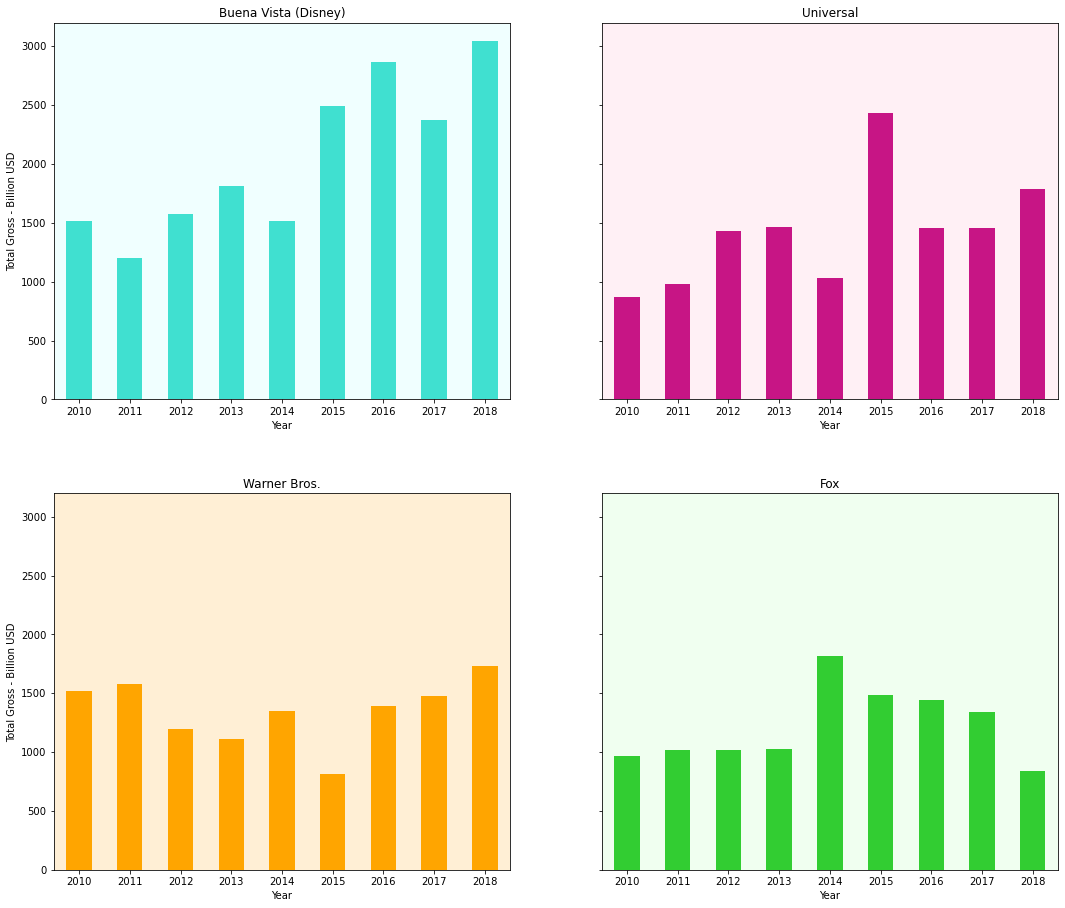

In [104]:
# top 6 grossing: BV, Uni, WB, Fox, Sony, Par.

fig, axes = plt.subplots(ncols = 2, nrows = 2, sharey=True, figsize=(18,12))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=.25, wspace=0.2)

ax00=axes[0][0]
bv_gr.domestic_gross_mil.plot(kind='bar', ax=ax00, color='turquoise');
ax00.set_title('Buena Vista (Disney)')
ax00.set_xlabel('Year')
ax00.set_ylabel('Total Gross - Billion USD')
ax00.set_xticklabels(ax00.get_xticklabels(), rotation=0)
ax00.set_facecolor('azure')

ax01=axes[0][1]
uni_gr.domestic_gross_mil.plot(kind='bar', ax=ax01, color='mediumvioletred');
ax01.set_title('Universal')
ax01.set_xlabel('Year')
ax01.set_ylabel('Total Gross - Billion USD')
ax01.set_xticklabels(ax01.get_xticklabels(), rotation=0)
ax01.set_facecolor('lavenderblush')

ax10=axes[1][0]
wb_gr.domestic_gross_mil.plot(kind='bar', ax=ax10, color='orange');
ax10.set_title('Warner Bros.')
ax10.set_xlabel('Year')
ax10.set_ylabel('Total Gross - Billion USD')
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=0)
ax10.set_facecolor('papayawhip')

ax11=axes[1][1]
fox_gr.domestic_gross_mil.plot(kind='bar', ax=ax11, color='limegreen');
ax11.set_title('Fox')
ax11.set_xlabel('Year')
ax11.set_ylabel('Total Gross - Billion USD')
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=0)
ax11.set_facecolor('honeydew')

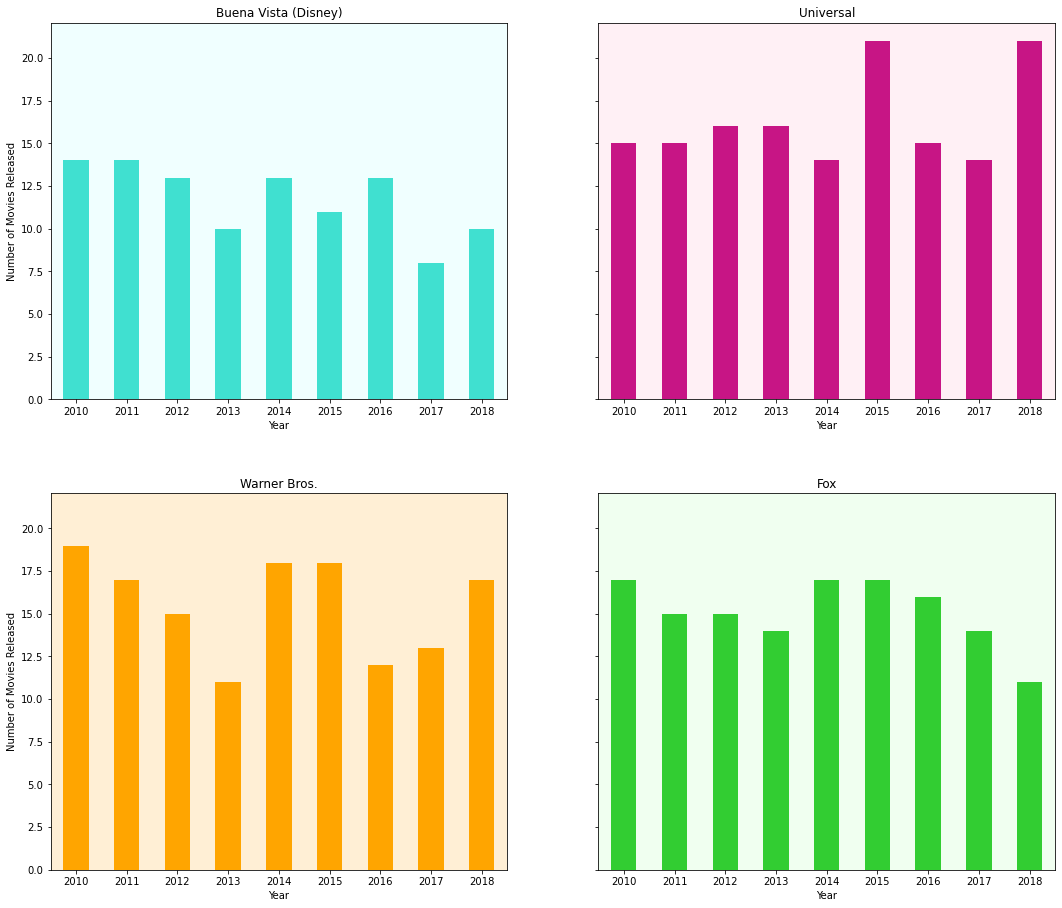

In [105]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, sharey=True, figsize=(18,12))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=.25, wspace=0.2)

ax00=axes[0][0]
bv_gr.title.plot(kind='bar', ax=ax00, color='turquoise');
ax00.set_title('Buena Vista (Disney)')
ax00.set_xlabel('Year')
ax00.set_ylabel('Number of Movies Released')
ax00.set_xticklabels(ax00.get_xticklabels(), rotation=0)
ax00.set_facecolor('azure')


ax01=axes[0][1]
uni_gr.title.plot(kind='bar', ax=ax01, color='mediumvioletred');
ax01.set_title('Universal')
ax01.set_xlabel('Year')
ax01.set_ylabel('Number of Movies Released')
ax01.set_xticklabels(ax01.get_xticklabels(), rotation=0)
ax01.set_facecolor('lavenderblush')

ax10=axes[1][0]
wb_gr.title.plot(kind='bar', ax=ax10, color='orange');
ax10.set_title('Warner Bros.')
ax10.set_xlabel('Year')
ax10.set_ylabel('Number of Movies Released')
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=0)
ax10.set_facecolor('papayawhip')

ax11=axes[1][1]
fox_gr.title.plot(kind='bar', ax=ax11, color='limegreen');
ax11.set_title('Fox')
ax11.set_xlabel('Year')
ax11.set_ylabel('Number of Movies Released')
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=0)
ax11.set_facecolor('honeydew')

In [106]:
studio_prod = studio.groupby('studio').agg({'domestic_gross': 'sum', 'title': 'count'}).sort_values(by='title',ascending=False)
studio_prod['domestic_gross'] = studio_prod['domestic_gross'] / 1000000
studio_prod.columns = ['dom_gross_mil', 'title_count']
studio_prod.sort_values(by='dom_gross_mil', ascending=False).head()

,dom_gross_mil,title_count
studio,,
BV,18419.029199,106
Uni.,12902.393000,147
WB,12168.046000,140
Fox,10949.499997,136
Sony,8459.683098,110


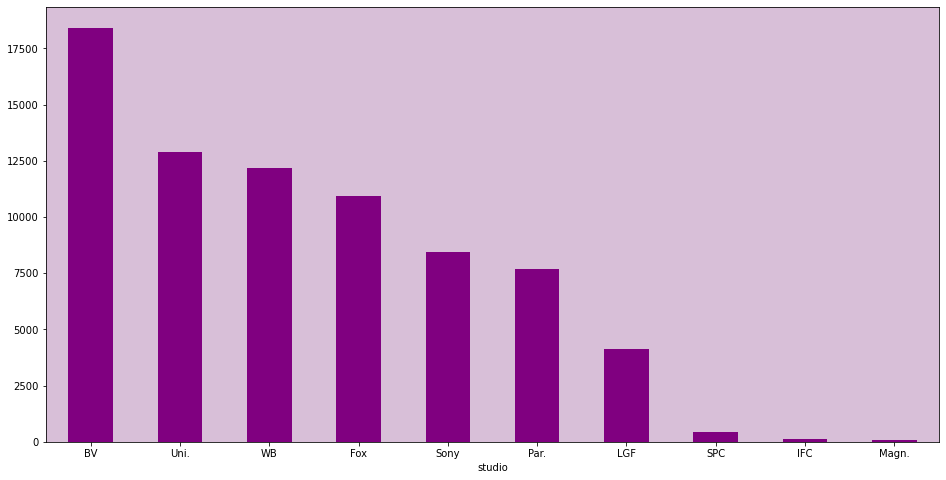

In [107]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(16,8))
studio_prod.dom_gross_mil.head(10).sort_values(ascending=False).plot.bar(color='purple')
plt.xticks(rotation=0)
ax.set_facecolor('thistle')

In [108]:
studio_prod.sort_values(by='title_count', ascending=False).head()

,dom_gross_mil,title_count
studio,,
IFC,112.662899,166
Uni.,12902.393000,147
WB,12168.046000,140
Fox,10949.499997,136
Magn.,63.559700,136


In [109]:
# export cleaned studio
studio.to_csv('studio.csv')

## Explore Basics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


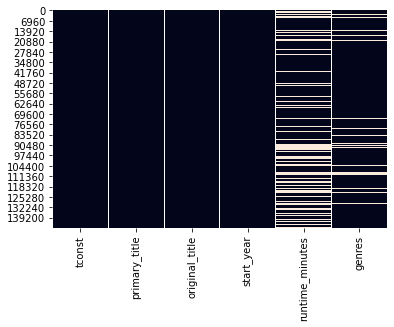

In [110]:
##### what I want: title, genre, run time
basics  = pd.read_csv(pwd+'imdb.title.basics.csv')
basics.info()
basics.head()
sns.heatmap(basics.isnull(), cbar=False); # missing 
basics.isna().sum() # missing 21 'original_titles'
                    # missing 3.7% of genres, will populate with 'Unlisted'
                    # missing 21.7% of runtime minutes, replacement??????????????????
# missing 21, originalTitle (string) - original title, in the original language
sns.heatmap(basics.isnull(), cbar=False);

## Add ratings to basics

In [111]:
ratings  = pd.read_csv(pwd+'imdb.title.ratings.csv')
# title listed as 'tconst', same as 'basics'
ratings.info() # no missing data
ratings.head()
ratings.describe(include=[np.number])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [112]:
ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [113]:
# Shows IMDB's weighted average rating and number of votes cast
# I have not adjusted the average as IMDB claims to already weight it
# https://help.imdb.com/article/imdb/track-movies-tv/weighted-average-ratings/GWT2DSBYVT2F25SK#
# join rating onto ORIGINAL basics db on tconst column to get movie titles for ratings
basics = pd.merge(left=basics, right=ratings, how='left', left_on='tconst', right_on='tconst')
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [114]:
basics.isna().mean() 
# now we have missing about 50% of ratings information for our total movies

tconst             0.000000
primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
averagerating      0.494635
numvotes           0.494635
dtype: float64

In [115]:
# merge studio and ratings
studio_ratings = pd.merge(left=studio, right=basics, how='left', left_on='title', right_on='primary_title')

In [116]:
len(studio_ratings)

4147

In [117]:
# drop titles no longer needed
studio_ratings.drop(['tconst', 'primary_title', 'original_title', 'start_year', 'genres'], axis=1, inplace=True)

In [118]:
studio_ratings.dropna(axis=0, subset=['averagerating'], inplace=True)


In [119]:
studio_ratings.isna().sum()

title               0
studio              3
domestic_gross     22
year                0
runtime_minutes    47
averagerating       0
numvotes            0
dtype: int64

In [120]:
studio_ratings.to_csv('studio_ratings.csv')

In [121]:
per_studio_ratings = studio_ratings.groupby('studio').agg({'title': 'nunique', 'domestic_gross': 'sum', 'year': 'nunique', 
                                          'runtime_minutes': 'mean', 'averagerating': 'mean', 
                                          'numvotes': 'sum'})

per_studio_ratings.columns = ['title_count', 'sum_dom_gross', 'year_count', 'avg_runtime_min', 'average_rating', 'total_votes']
per_studio_ratings

,title_count,sum_dom_gross,year_count,avg_runtime_min,average_rating,total_votes
studio,,,,,,
3D,1,6.100000e+06,1,41.000000,6.900000,364.0
A23,2,1.642000e+05,2,82.500000,6.950000,2859.0
A24,42,2.797638e+08,6,103.409091,6.522222,2945783.0
ADC,2,2.482000e+05,2,91.000000,6.250000,43064.0
AF,5,3.189900e+06,4,96.500000,7.128571,35443.0
...,...,...,...,...,...,...
Wein.,64,1.673979e+09,8,109.807692,6.727160,7079427.0
XL,1,1.170000e+05,1,95.000000,6.500000,362.0
Yash,11,3.922240e+07,7,141.916667,5.892308,267249.0


In [122]:
# export cleaned studio
per_studio_ratings.to_csv('per_studio_ratings.csv')

In [123]:
# fill with 0. future use we will search for ratings > 0
# fill NaN from LEFT join of ratings with 0 so as not to effect the mean when adding; check to be sure
basics.averagerating.fillna(0, inplace=True)
basics.numvotes.fillna(0, inplace=True)
basics.runtime_minutes.fillna(0, inplace=True)
basics.isna().mean() 

tconst             0.000000
primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.000000
genres             0.037005
averagerating      0.000000
numvotes           0.000000
dtype: float64

(array([0.00575107, 0.0180493 , 0.04841056, 0.09775447, 0.18815197,
        0.28629077, 0.23963709, 0.11595476]),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 8 Patch objects>)

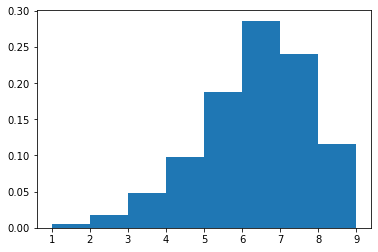

In [124]:
bins = range(1, 10, 1) # remove 0.0 rating from replace
plt.hist(basics.averagerating, bins, density=True)

## Dates / Future

In [125]:
# continue exploring basics
basics['start_year'].min(), basics['start_year'].max() # 2010 - 2115????

(2010, 2115)

In [126]:
# investigate movies with release dates in future
basics.loc[basics['start_year'] > 2020]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,0.0,"Action,Adventure,Fantasy",0.0,0.0
93,tt0427340,Masters of the Universe,Masters of the Universe,2021,0.0,"Action,Adventure,Drama",0.0,0.0
820,tt10042440,Untitled Marvel Film,Untitled Marvel Film,2021,0.0,Action,0.0,0.0
821,tt10042446,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,0.0,Action,0.0,0.0
948,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,0.0,Action,0.0,0.0
...,...,...,...,...,...,...,...,...
143910,tt9603208,Mission: Impossible 8,Mission: Impossible 8,2022,0.0,"Action,Adventure,Thriller",0.0,0.0
143911,tt9603212,Mission: Impossible 7,Mission: Impossible 7,2021,0.0,"Action,Adventure,Thriller",0.0,0.0
144423,tt9663764,Aquaman 2,Aquaman 2,2022,0.0,"Action,Sci-Fi",0.0,0.0
145637,tt9848626,Hotel Transylvania 4,Hotel Transylvania 4,2021,0.0,"Adventure,Animation,Comedy",0.0,0.0


In [127]:
# look into future genre saturation: which is 126 movies
basics_future = basics.loc[basics['start_year'] > 2020]
basics_future['genres'] = basics_future['genres'].fillna('Unlisted')
basics_future['genres_list'] = basics_future['genres'].str.split(",")
len(basics) - len(basics_future) #146018
basics_future.head()

<ipython-input-127-f028934c398a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics_future['genres'] = basics_future['genres'].fillna('Unlisted')
<ipython-input-127-f028934c398a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics_future['genres_list'] = basics_future['genres'].str.split(",")


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_list
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,0.0,"Action,Adventure,Fantasy",0.0,0.0,"[Action, Adventure, Fantasy]"
93,tt0427340,Masters of the Universe,Masters of the Universe,2021,0.0,"Action,Adventure,Drama",0.0,0.0,"[Action, Adventure, Drama]"
820,tt10042440,Untitled Marvel Film,Untitled Marvel Film,2021,0.0,Action,0.0,0.0,[Action]
821,tt10042446,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,0.0,Action,0.0,0.0,[Action]
948,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,0.0,Action,0.0,0.0,[Action]


In [128]:
# drop future movies from basics in this instance
basics = basics.drop(basics_future.index)
basics.loc[basics['start_year'] > 2020]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [129]:
basics_future.primary_title.value_counts().head(30) # includes 26 untitled movies

Unitlted Disney Live Action Project                 4
Untitled Illumination Entertainment Project         4
Untitled Disney Marvel Film                         3
Untitled Marvel Film                                3
Untitled Pixar Animation Project                    3
Untitled Star Wars Film                             3
Untitled Disney Animation Project                   2
Untitled Disney Live-Action Project                 2
Masters of the Universe                             1
Heartbreak Falls                                    1
Pinocchio                                           1
DC Super Pets                                       1
Black Cat                                           1
Mortal Kombat                                       1
The Weary Traveler                                  1
Corazones en Llamas 5                               1
Drift and Return                                    1
Mission: Impossible 8                               1
The Boss Baby 2             

In [130]:
basics_future['start_year'].sort_values().unique()

array([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2115])

In [131]:
basics_future.loc[basics_future['start_year'] > 2027] # fake movie

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_list
89506,tt5174640,100 Years,100 Years,2115,0.0,Drama,0.0,0.0,[Drama]


## Duplicates

In [132]:
# No tconst duplicates, a functional index
len(basics[basics.duplicated(subset='tconst', keep=False)])

0

In [133]:
# deal with missing 'original_title's
len(basics.loc[basics['original_title'] == basics['primary_title']])/len(basics) 
# 131661/146144 = 90.1% of cases these categories are the same

0.9006971743209742

In [134]:
# replace missing 'original_title' with 'primary_title'
basics['original_title'] = basics['original_title'].fillna(basics['primary_title'])

In [135]:
basics.original_title.nunique() - basics.primary_title.nunique() 
# 1715 more occurances of 'original_title' than 'primary_title'
#(usually due to title's orignal language/mulitple versions)
# according to imdb ino about data set, primary title:
# primaryTitle (string) – the more popular title / 
# the title used by the filmmakers on promotional materials ****at the point of release****
# thus, primary title may show up multiple time based off different versions of 'original_title'
# but each primary title only 

1715

In [136]:
len(basics.loc[basics['original_title'] != basics['primary_title']]) # 14479

14479

In [137]:
## EXACT duplicate by all standards EXCEPT tconst
basics.loc[basics['original_title'] == 'Ângelo de Sousa - Tudo o Que Sou Capaz']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
66989,tt3815122,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0.0,0.0
66990,tt3815124,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0.0,0.0
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0.0,0.0
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0.0,0.0
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0.0,0.0
66994,tt3815132,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0.0,0.0
66995,tt3815134,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0.0,0.0


In [138]:
# investigatte dupes by looking at everything except 'tconst' and 'genres_list', as connot pass list/list into subset
cols = list(basics.columns)[1:7]
cols

['primary_title',
 'original_title',
 'start_year',
 'runtime_minutes',
 'genres',
 'averagerating']

In [139]:
# found dupes!
# not afraid to drop unique tconst because have already merged ratings column, no longer need tconst
basics[basics.duplicated(subset=cols, keep=False)].sort_values(['original_title', 'start_year'])

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
129962,tt8032828,100 Milioni di bracciate,100 Milioni di bracciate,2017,0.0,Biography,0.0,0.0
129979,tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,0.0,Biography,0.0,0.0
144337,tt9653930,3. Elma,3. Elma,2014,65.0,Drama,0.0,0.0
144392,tt9660588,3. Elma,3. Elma,2014,65.0,Drama,0.0,0.0
145118,tt9773302,3. Elma,3. Elma,2014,65.0,Drama,0.0,0.0
...,...,...,...,...,...,...,...,...
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0.0,0.0
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0.0,0.0
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0.0,0.0
66994,tt3815132,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0.0,0.0


In [140]:
# drop the EXACT matches
basics.drop_duplicates(subset=cols, keep='first', inplace=True)

In [141]:
# Check that all exact duplicates have been dropped (previously listed 7 times, now just once)
basics.loc[basics['primary_title'] == 'Ângelo de Sousa - Tudo o Que Sou Capaz']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
66989,tt3815122,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0.0,0.0


In [142]:
# investigate primary title duplicates

prim_check = basics.groupby(['primary_title', 'start_year']).agg({'original_title': 'count', 'start_year': 
                                                                  'nunique', 'runtime_minutes': 'nunique'}
                                                                ).sort_values(by='original_title', ascending=False)
prim_check[prim_check['original_title'] > 1].shape

# 1865 cases where primary title represents multiple movies, max of 6 originals to 1 primary, that was due to duplicatte
# reduced to 1661 rows

(1791, 3)

In [143]:
og_check = basics.groupby(['original_title', 'start_year']).agg({'primary_title': 'nunique', 'start_year': 
                                                                  'nunique', 'runtime_minutes': 'nunique'}
                                                                ).sort_values(by='primary_title', ascending=False)
og_check[og_check['primary_title'] > 1].shape
# 1528 cases where original title represents multiple primary titles.... max of 2 primaries to 1 original
# reduced to 84 rows!!

(84, 3)

In [144]:
cols2 = cols[:4]
cols2

['primary_title', 'original_title', 'start_year', 'runtime_minutes']

In [145]:
basics[basics.duplicated(subset=cols2, keep=False)].sort_values(by='primary_title').head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
114899,tt6804666,8:30,8:30,2017,70.0,Mystery,0.0,0.0
86522,tt5017134,8:30,8:30,2017,70.0,Mystery,6.2,11.0
105960,tt6200522,A Ballad of Maladies,A Ballad of Maladies,2016,86.0,"Documentary,History,Music",0.0,0.0
104657,tt6119224,A Ballad of Maladies,A Ballad of Maladies,2016,86.0,"Documentary,Music",0.0,0.0
73546,tt4191350,A Courtship,A Courtship,2015,71.0,"Documentary,Romance",6.9,17.0


In [146]:
basics.drop_duplicates(subset=cols2, keep='first', inplace=True)

In [147]:
# find duplicates based off 'original_title'
og_dupes = basics[basics.duplicated(subset=['original_title', 'start_year'], 
                                            keep=False)].sort_values(['original_title', 'start_year'])
og_dupes.sort_values(by=['original_title', 'start_year']).head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
103890,tt6085916,(aguirre),(aguirre),2016,97.0,"Biography,Documentary",0.0,0.0
106201,tt6214664,(aguirre),(aguirre),2016,98.0,"Biography,Comedy,Documentary",0.0,0.0
20394,tt1855110,180,180,2011,121.0,"Drama,Romance",6.0,688.0
24194,tt1979163,180,180,2011,107.0,"Comedy,Drama",7.4,42.0
65431,tt3735338,1989,1989,2014,54.0,Documentary,6.8,5.0
72121,tt4119270,1989,1989,2014,97.0,"Documentary,History,Thriller",7.5,175.0
86006,tt4981966,24,24,2016,164.0,"Action,Sci-Fi,Thriller",7.9,14662.0
98602,tt5765582,24,24,2016,0.0,Thriller,0.0,0.0
29202,tt2123129,3,3,2012,145.0,"Drama,Mystery,Romance",7.2,3471.0
38370,tt2379653,3,3,2012,115.0,"Comedy,Drama",6.1,101.0


In [148]:
len(og_dupes), len(og_dupes)/len(basics) * 100 #3.4%


(2733, 1.8748585109521099)

In [149]:
prim_dupes = basics[basics.duplicated(subset=['primary_title', 'start_year'], keep=False)].sort_values('primary_title')
prim_dupes.sort_values(by=['primary_title', 'start_year']).head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
106201,tt6214664,(aguirre),(aguirre),2016,98.0,"Biography,Comedy,Documentary",0.0,0.0
103890,tt6085916,(aguirre),(aguirre),2016,97.0,"Biography,Documentary",0.0,0.0
20394,tt1855110,180,180,2011,121.0,"Drama,Romance",6.0,688.0
24194,tt1979163,180,180,2011,107.0,"Comedy,Drama",7.4,42.0
65431,tt3735338,1989,1989,2014,54.0,Documentary,6.8,5.0
72121,tt4119270,1989,1989,2014,97.0,"Documentary,History,Thriller",7.5,175.0
50212,tt2979366,21 Days,21 Days,2014,89.0,"Horror,Thriller",4.5,454.0
75495,tt4312624,21 Days,21 den,2014,70.0,Documentary,6.0,5.0
86006,tt4981966,24,24,2016,164.0,"Action,Sci-Fi,Thriller",7.9,14662.0
98602,tt5765582,24,24,2016,0.0,Thriller,0.0,0.0


In [150]:
len(prim_dupes)/len(basics) * 100 # 2.38%

2.385248094614155

## Genres

In [151]:
# replace missing genres with 'Unlisted'
basics['genres'] = basics['genres'].fillna('Unlisted')
basics['genres_list'] = basics['genres'].str.split(",")
basics['genres_list'][:5]


0      [Action, Crime, Drama]
1          [Biography, Drama]
2                     [Drama]
3             [Comedy, Drama]
4    [Comedy, Drama, Fantasy]
Name: genres_list, dtype: object

In [152]:
basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,[Drama]


In [153]:
total_list = []
for lst in basics['genres_list'].values:
    total_list.extend(lst)
# Count occurances of each genre because order is not important (its listed alphabetically)
counter = Counter(total_list)
# Sort by descending values
srt = sorted(counter.items(), key=lambda x: x[1], reverse=True)
# Create plot axis of (Genre, Counts)
x_val= list(map(lambda x: x[0], srt)) # label
y_val = list(map(lambda x: x[1], srt)) # value
srt[:5]

[('Documentary', 51556),
 ('Drama', 49793),
 ('Comedy', 25270),
 ('Thriller', 11864),
 ('Horror', 10785)]

Text(0, 0.5, 'Number of Labels')

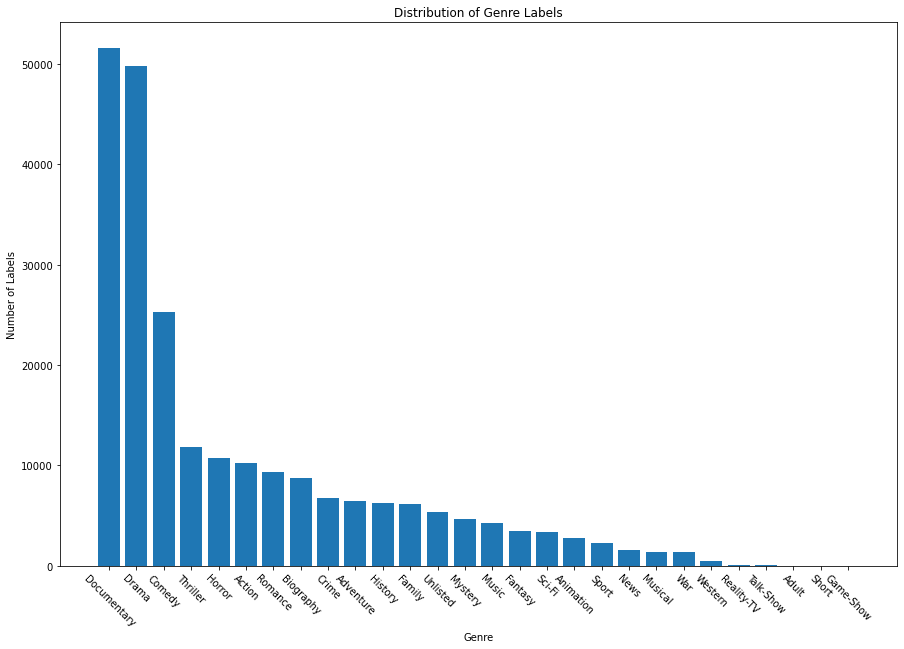

In [154]:
plt.figure(figsize=(15,10))
plt.bar(x_val, y_val)
plt.title('Distribution of Genre Labels')
plt.xticks(rotation=-45)
plt.xlabel('Genre')
plt.ylabel('Number of Labels')

### Dummuy Genres

In [155]:
### "dumify" genres category, plot bar chart of frequency
genre_dums = pd.get_dummies(basics['genres_list'].apply(pd.Series).stack()).sum(level=0)
# slow, don't run again

In [156]:
genre_names = list(genre_dums.columns)
genre_names[:5]

['Action', 'Adult', 'Adventure', 'Animation', 'Biography']

In [157]:
srt_gd = genre_dums.sum().sort_values(ascending=False)
x_genre_dums= list(srt_gd.index)
y_genre_dums= list(srt_gd.values) # value
zip_genre_dums = list(zip(x_genre_dums, y_genre_dums))
list(zip_genre_dums)[:5]

[('Documentary', 51556),
 ('Drama', 49793),
 ('Comedy', 25270),
 ('Thriller', 11864),
 ('Horror', 10785)]

Text(0, 0.5, 'Number of Labels')

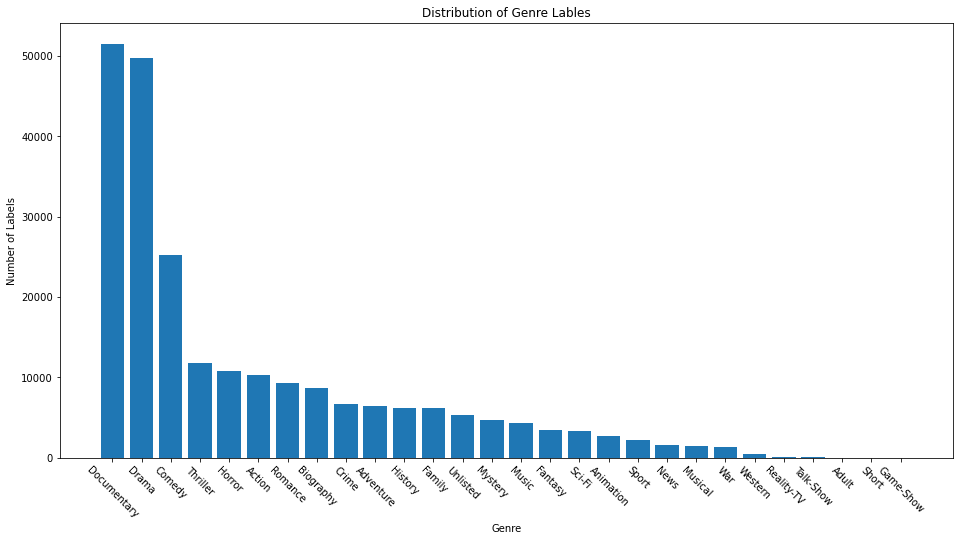

In [179]:
plt.figure(figsize=(16,8))
plt.bar(x_genre_dums, y_genre_dums)
plt.title('Distribution of Genre Lables')
plt.xlabel('Genre')
plt.xticks(rotation=-45)
plt.ylabel('Number of Labels')

# Future genres

In [159]:
# of 126 movies listed for future production through 2027 (minus '100 years movie outlier')
# the known disttribution is as so:
fut_list = []
for item in basics_future['genres_list'].values:
    if type(item) == 'str':
        fut_list.extend(item)
    fut_list.extend(item)

# Count occurances of each genre because order is not important (its listed alphabetically)
fut_counter = Counter(fut_list)
# Sort by descending values
fut_srt = sorted(fut_counter.items(), key=lambda x: x[1], reverse=True)
# Create plot axis of (Genre, Counts)
fut_x_val= list(map(lambda x: x[0], fut_srt)) # label
fut_y_val = list(map(lambda x: x[1], fut_srt)) # value
fut_srt[:5]

[('Action', 42),
 ('Adventure', 29),
 ('Drama', 29),
 ('Comedy', 20),
 ('Animation', 20)]

Text(0, 0.5, 'Number of Labels')

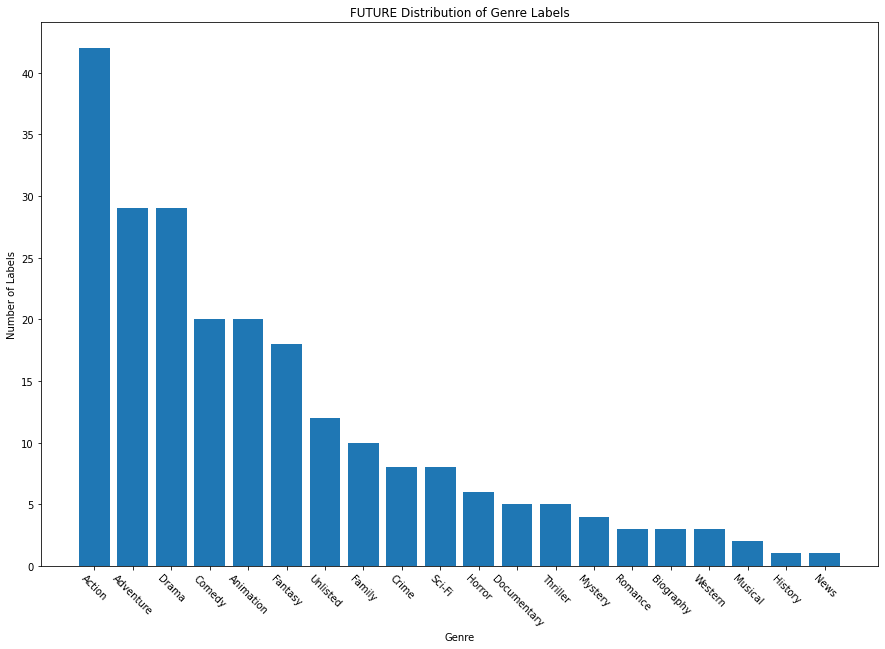

In [160]:
plt.figure(figsize=(15,10))
plt.bar(fut_x_val, fut_y_val)
plt.title('FUTURE Distribution of Genre Labels')
plt.xticks(rotation=-45)
plt.xlabel('Genre')
plt.ylabel('Number of Labels')

# Genre check?

In [180]:
basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_list,runtime_bins
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,"[Action, Crime, Drama]","(150.0, 180.0]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,"[Biography, Drama]","(90.0, 120.0]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,[Drama],"(120.0, 150.0]"


In [162]:
basics_genres = basics.join(genre_dums)
basics_genres['genre_len'] = basics['genres_list'].apply(lambda row: len(row))
# pass in a list of column names and add across the row
basics_genres['genre_sum'] = basics_genres[genre_names].sum(axis=1)                              
basics_genres['genre_check'] = (basics_genres['genre_len'] == basics_genres['genre_sum'])
basics_genres.loc[basics_genres.genre_check == False] # blank


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_list,Action,...,Short,Sport,Talk-Show,Thriller,Unlisted,War,Western,genre_len,genre_sum,genre_check


In [163]:
basics_genres.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_list,Action,...,Short,Sport,Talk-Show,Thriller,Unlisted,War,Western,genre_len,genre_sum,genre_check
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,"[Action, Crime, Drama]",1,...,0,0,0,0,0,0,0,3,3,True
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,"[Biography, Drama]",0,...,0,0,0,0,0,0,0,2,2,True
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,[Drama],0,...,0,0,0,0,0,0,0,1,1,True
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.0,"Comedy,Drama",6.1,13.0,"[Comedy, Drama]",0,...,0,0,0,0,0,0,0,2,2,True
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"[Comedy, Drama, Fantasy]",0,...,0,0,0,0,0,0,0,3,3,True


In [164]:
studio_genres = pd.merge(left=studio, right=basics_genres, how='left', left_on='title', right_on='primary_title')

In [165]:
studio_genres.fillna(0, inplace=True)

In [166]:
studio_genres = studio_genres.drop(['title','domestic_gross',
 'year',
 'tconst',
 'primary_title',
 'original_title',
 'start_year',
 'runtime_minutes',
 'averagerating',
 'numvotes',
 'genres_list',], axis=1)

In [167]:
studio_genres.head()

,studio,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Short,Sport,Talk-Show,Thriller,Unlisted,War,Western,genre_len,genre_sum,genre_check
0,BV,"Adventure,Animation,Comedy",0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,True
1,BV,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,WB,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,WB,"Action,Adventure,Sci-Fi",1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,True
4,P/DW,"Adventure,Animation,Comedy",0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,True


In [168]:
studio_genres = studio_genres.groupby('studio').sum()

In [169]:
studio_genres.to_csv('studio_genres.csv')

# run time plus rating? genre plus run time?

# runtimes

In [170]:
# we are looking at major THEATER movies, not documentaries that are 24 hours long

basics.runtime_minutes.describe()
# 50% plus 1 std
top_fence = round(basics.runtime_minutes.quantile(.5) + basics.runtime_minutes.std(), 3)
top_fence #253.361


230.586

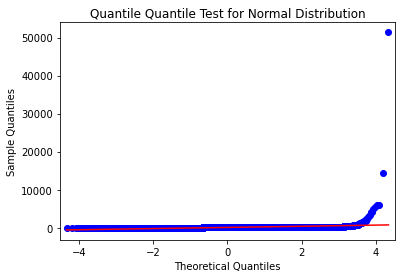

In [171]:
basics.runtime_minutes.describe() # most between 80-100

basics.runtime_minutes.quantile()

# IQR = Q3 (.75) - Q1 (.25)
Q1 = basics.runtime_minutes.quantile(.25)
Q3 = basics.runtime_minutes.quantile(.75)
IQR = Q3 - Q1
upper_fence = Q3 + (IQR * 1.5)
lower_fence = Q1 - (IQR * 1.5)
lower_fence, upper_fence # (26.5, 142.5)

basics.runtime_minutes.loc[basics.runtime_minutes >= 142.5].sum()/146144  
# 4.47% of movies fall above the IQR fence

# non-normal distribution
# Quantile-Quantile Plot expects 45* line from original to signal Gaussian distribution
qqplot(basics.runtime_minutes, line='s')
plt.title('Quantile Quantile Test for Normal Distribution')
plt.show() # hard fail
# very skewed by some multi-day length documentaries. 
# since we are interested in creating movies for people to pay to see at the theater, 
# it should be something that is possible to watch in one sitting

In [172]:
len(basics['runtime_minutes']), basics['runtime_minutes'].isna().sum() # 21.7% missing values

(145771, 0)

In [173]:
cut_bins = [0, 30, 60, 90, 120, 150, 180, 240, 51420]
basics['runtime_bins'] = pd.cut(basics['runtime_minutes'], bins=cut_bins, right=True).astype(str)
basics.runtime_bins.value_counts()
# df = df.drop(columns = ['quantile_ex_1','quantile_ex_2', 'quantile_ex_3', 'quantile_ex_4'])
# there are only 225 movies above 240 minutes of 114405 records providing data = 0.196%
# right bound bins: '[' signifies included, '(' signifies not included 

(60.0, 90.0]        48014
(90.0, 120.0]       35733
nan                 31488
(30.0, 60.0]        17142
(120.0, 150.0]       6922
(0.0, 30.0]          4515
(150.0, 180.0]       1419
(180.0, 240.0]        331
(240.0, 51420.0]      207
Name: runtime_bins, dtype: int64

Text(0, 0.5, 'Number of Titles')

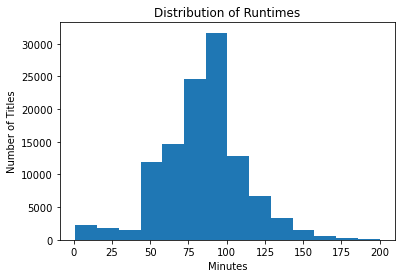

In [174]:
runtimes = basics[(basics['runtime_minutes'] <= 200) & (basics['runtime_minutes'] > 0)]
len(runtimes) # 114198 records represented
plt.hist(runtimes.runtime_minutes, bins=14)
plt.title('Distribution of Runtimes')
plt.xlabel('Minutes')
plt.ylabel('Number of Titles')# we can see after removing outliers and placebholders the data is much more normally distributed
# giving us insight that the most common runtime is between 75-100 minutes

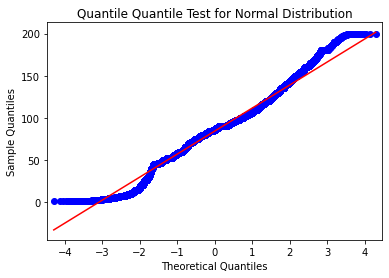

In [175]:
qqplot(runtimes.runtime_minutes, line='s')
plt.title('Quantile Quantile Test for Normal Distribution')
plt.show()

In [176]:
runtimes.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_list,runtime_bins
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,"[Action, Crime, Drama]","(150.0, 180.0]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,"[Biography, Drama]","(90.0, 120.0]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,[Drama],"(120.0, 150.0]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"[Comedy, Drama, Fantasy]","(60.0, 90.0]"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,0.0,0.0,[Comedy],"(60.0, 90.0]"


In [199]:
runtime_bins = runtimes.groupby('runtime_bins')['genres_list'].sum().to_frame()

In [200]:
runtime_bins

,genres_list
runtime_bins,
"(0.0, 30.0]","[Documentary, History, Documentary, Documentar..."
"(120.0, 150.0]","[Drama, Drama, Unlisted, Adventure, Drama, Rom..."
"(150.0, 180.0]","[Action, Crime, Drama, Documentary, Animation,..."
"(180.0, 240.0]","[Drama, History, War, Documentary, Music, Come..."
"(30.0, 60.0]","[Documentary, Documentary, Documentary, Docume..."
"(60.0, 90.0]","[Comedy, Drama, Fantasy, Comedy, Adventure, An..."
"(90.0, 120.0]","[Biography, Drama, History, Drama, Drama, Dram..."


In [202]:
# reorder index ascending
runtime_bins = runtime_bins.reindex(['(0.0, 30.0]', '(30.0, 60.0]', '(60.0, 90.0]', '(90.0, 120.0]',
                             '(120.0, 150.0]', '(150.0, 180.0]', '(180.0, 240.0]'])

In [208]:
# add numerical index
runtime_bins.reset_index(inplace=True)

In [216]:
# check
runtime_bins.columns

Index(['runtime_bins', 'genres_list'], dtype='object')

In [210]:
def count_genres_runtimes(runtime_bins, index_val=int):
    ''' Function takes in a 'genres_list' Data Frame indexed on 'int' with category columns 'runtime_bins'
        and 'genres_list'. Returns a DataFrames with the counts for genre label occurances for that bin '''
    bin_gens = []
    #Select row
    fun_df = runtime_bins.loc[[index_val]]
    #Iterate over contents of that month's genres
    for item in fun_df['genres_list'].values:
        bin_gens.extend(item)
    genre_counter = Counter(bin_gens)
    genre_srt = sorted(genre_counter.items(), key=lambda y: y[1], reverse=True)
    return pd.DataFrame(genre_srt, columns=['genre', '{}'.format(runtimes.runtime_bins[index_val])]).sort_values('genre').set_index('genre')      
    

In [212]:
# cannot figure out how this function does not work for multiples of 3
# count_genres_runtimes(runtime_bins, 3)
# count_genres_runtimes(runtime_bins, 6)

In [213]:
# it works fine for all other numbers! will look into later...
runtime_genres = pd.concat([count_genres_runtimes(runtime_bins, 0),
                      count_genres_runtimes(runtime_bins, 1),
                      count_genres_runtimes(runtime_bins, 2),
                      count_genres_runtimes(runtime_bins, 4),
                      count_genres_runtimes(runtime_bins, 5),
                     ], axis=1)
runtime_genres

,"(150.0, 180.0]","(90.0, 120.0]","(120.0, 150.0]","(60.0, 90.0]","(60.0, 90.0]"
Action,81.0,557.0,2648.0,1188.0,395.0
Adventure,237.0,743.0,2414.0,332.0,63.0
Animation,89.0,320.0,1222.0,56.0,4.0
Biography,931.0,1714.0,3315.0,354.0,56.0
Comedy,176.0,1177.0,8675.0,1638.0,314.0
Crime,57.0,319.0,2178.0,559.0,104.0
Documentary,4411.0,12340.0,18802.0,673.0,196.0
Drama,600.0,2935.0,16219.0,3646.0,686.0
Family,344.0,749.0,2427.0,324.0,60.0
Fantasy,25.0,256.0,1278.0,208.0,38.0


In [217]:
# on hold until fix function above
# runtime_genres_dfs = []
# for x in range(0,7,1):
#     runtime_genres_dfs.extend(count_genres_runtimes(runtime_bins, x))
# runtime_genres = pd.concat(runtime_genres_dfs, axis=1, keys='genres')

# runtime_genres

In [218]:
run_gen_list = []
for index, row in runtime_bins.iterrows():
    for item in row['genres_list']:
        run_gen_list.extend(lst)
# Count occurances of each genre because order is not important (its listed alphabetically)
run_gen_counter = Counter(run_gen_list)
# Sort by descending values
srt_run_gen_list = sorted(run_gen_counter.items(), key=lambda x: x[1], reverse=True)
# Create plot axis of (Genre, Counts)
# x_val= list(map(lambda x: x[0], srt)) # label
# y_val = list(map(lambda x: x[1], srt)) # value
srt_run_gen_list

# for index, row in df.iterrows(): 
#     print (row["Name"], row["Age"])

[('Documentary', 195187)]

In [223]:
# runtime_genres_dfs = []
# for index, x in enumerate(range(0,7,1)):
#     runtime_genres_dfs.append(count_genres_runtimes(runtime_bins, x))
# runtime_genres = pd.concat(runtime_genres_dfs, axis=1)
# #runtime_genres = month_genres.drop(['Reality-TV', 'News']).fillna(0)
# runtime_genres

# MONEY 

In [224]:
# Reveals the production budget and domestic & worldwide gross sales per each film title.
##### what I want: budget, dom_gross, world_gross, release date (break into year and month)
money = pd.read_csv(pwd+'tn.movie_budgets.csv')
money.info() # no Nan/missing data
money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [225]:
# format $$ columns to float
def dirty_money(column):
    '''Reformats standard notation for USD ($0,000,000) into type 'float'.'''
    return column.str.replace("$","").str.replace(",","").astype(float)


In [226]:
money['budget'] = dirty_money(money['production_budget'])
money['budget'][:5]

0    425000000.0
1    410600000.0
2    350000000.0
3    330600000.0
4    317000000.0
Name: budget, dtype: float64

In [227]:
money['dom_gross'] = dirty_money(money['domestic_gross'])
money['dom_gross'][:5]

0    760507625.0
1    241063875.0
2     42762350.0
3    459005868.0
4    620181382.0
Name: dom_gross, dtype: float64

In [228]:
money['world_gross'] = dirty_money(money['worldwide_gross'])
money['world_gross'][:5]

0    2.776345e+09
1    1.045664e+09
2    1.497624e+08
3    1.403014e+09
4    1.316722e+09
Name: world_gross, dtype: float64

In [229]:
# drop unclean data
money = money.drop(money[['production_budget', 'domestic_gross', 'worldwide_gross']], axis=1) 
money.head()

,id,release_date,movie,budget,dom_gross,world_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [230]:
money.shape

(5782, 6)

In [231]:
# drop data missing budget for use in dom & world money
money.loc[money['budget'] == 0] # None
money.budget.min()

1100.0

# Time/season release?

In [232]:
money['release_date'] = pd.to_datetime(money['release_date'])
money['release_date'][0]

money['year'] = pd.DatetimeIndex(money['release_date']).year
money['month'] = pd.DatetimeIndex(money['release_date']).month
money = money[['release_date', 'year', 'month','movie', 'budget', 'dom_gross', ]]

money.head()

,release_date,year,month,movie,budget,dom_gross
0,2009-12-18,2009,12,Avatar,425000000.0,760507625.0
1,2011-05-20,2011,5,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0
2,2019-06-07,2019,6,Dark Phoenix,350000000.0,42762350.0
3,2015-05-01,2015,5,Avengers: Age of Ultron,330600000.0,459005868.0
4,2017-12-15,2017,12,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0


In [233]:
# drop data missing dom
# df.drop(df[df['Age'] < 25]

len(money.loc[money['dom_gross'] == 0])/len(money) # 548 of 5782 = 9.5%
dom_money = money.drop(money[money['dom_gross'] == 0].index) #successfully dropped
#dom_money = dom_money.drop(columns='world_gross')
dom_money.head() # (5234, 5)

,release_date,year,month,movie,budget,dom_gross
0,2009-12-18,2009,12,Avatar,425000000.0,760507625.0
1,2011-05-20,2011,5,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0
2,2019-06-07,2019,6,Dark Phoenix,350000000.0,42762350.0
3,2015-05-01,2015,5,Avengers: Age of Ultron,330600000.0,459005868.0
4,2017-12-15,2017,12,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0


In [234]:
money['year'].min(),money['year'].max()

(1915, 2020)

In [235]:
dom_money['dom_profit'] = dom_money['dom_gross'] - dom_money['budget']
dom_money['dom_profit_mil'] = (dom_money['dom_gross'] - dom_money['budget'])/mil
dom_money['dom_profit_margin'] = round(dom_money['dom_profit'] / dom_money['dom_gross'], 3) * 100
dom_money['dom_ROI%'] = round(dom_money['dom_profit'] / dom_money['budget'], 3) * 100


In [236]:
dom_money.head()

,release_date,year,month,movie,budget,dom_gross,dom_profit,dom_profit_mil,dom_profit_margin,dom_ROI%
0,2009-12-18,2009,12,Avatar,425000000.0,760507625.0,335507625.0,335.507625,44.1,78.9
1,2011-05-20,2011,5,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,-169536125.0,-169.536125,-70.3,-41.3
2,2019-06-07,2019,6,Dark Phoenix,350000000.0,42762350.0,-307237650.0,-307.237650,-718.5,-87.8
3,2015-05-01,2015,5,Avengers: Age of Ultron,330600000.0,459005868.0,128405868.0,128.405868,28.0,38.8
4,2017-12-15,2017,12,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,303181382.0,303.181382,48.9,95.6


In [237]:
# export cleaned studio
dom_money.to_csv('dom_money.csv')

In [238]:
srt_months = money.groupby('month')['dom_gross'].sum()
months = list(srt_months.index)
money_months = list(srt_months.values)

month_names = list(map(lambda x: calendar.month_name[x], months)) 
zip_months = list(zip(month_names, money_months))
zip_months[:5]


[('January', 8310517342.0),
 ('February', 13882543926.0),
 ('March', 18129303397.0),
 ('April', 12407092932.0),
 ('May', 27146065077.0)]

In [239]:
roi_months = dom_money.groupby('month')['dom_ROI%'].mean().to_frame()
roi_months

,dom_ROI%
month,
1,221.280757
2,237.483102
3,155.876815
4,118.683215
5,205.455759
6,565.822222
7,262.315144
8,297.083940
9,146.154725


In [240]:
# export cleaned studio
roi_months.to_csv('roi_months.csv')

In [241]:
srt_months.sort_values(ascending=False) # top gross months 4: 12, 6, 11, 5

month
12    3.434511e+10
6     3.153157e+10
11    2.827605e+10
5     2.714607e+10
7     2.672034e+10
3     1.812930e+10
8     1.595543e+10
10    1.399466e+10
2     1.388254e+10
4     1.240709e+10
9     1.141289e+10
1     8.310517e+09
Name: dom_gross, dtype: float64

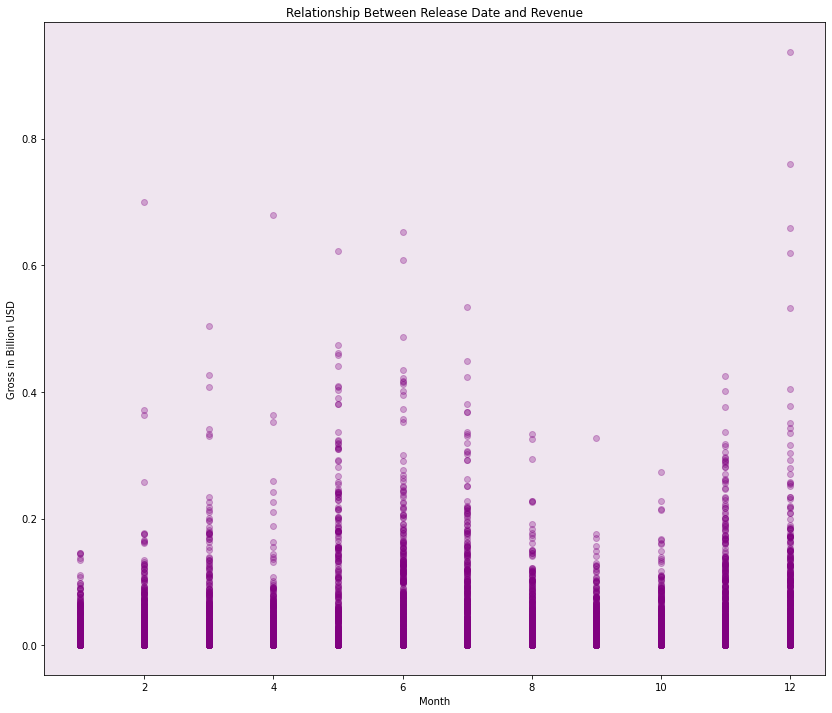

In [242]:
plt.figure(figsize=(14,12))
ax = plt.axes()
plt.title('Relationship Between Release Date and Revenue')
plt.xlabel(month_names)
plt.xlabel('Month')
plt.ylabel('Gross in Billion USD')
plt.scatter(dom_money['month'], (dom_money['dom_gross']/bil), color='purple', alpha=0.3)

ax.set_facecolor('thistle')
ax.patch.set_alpha(0.4)



In [243]:
money_gen = pd.merge(left=money, right=basics[['primary_title','genres_list']], how='inner', left_on='movie', right_on='primary_title')
money_gen.head()

,release_date,year,month,movie,budget,dom_gross,primary_title,genres_list
0,2009-12-18,2009,12,Avatar,425000000.0,760507625.0,Avatar,[Horror]
1,2011-05-20,2011,5,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,Pirates of the Caribbean: On Stranger Tides,"[Action, Adventure, Fantasy]"
2,2019-06-07,2019,6,Dark Phoenix,350000000.0,42762350.0,Dark Phoenix,"[Action, Adventure, Sci-Fi]"
3,2015-05-01,2015,5,Avengers: Age of Ultron,330600000.0,459005868.0,Avengers: Age of Ultron,"[Action, Adventure, Sci-Fi]"
4,2018-04-27,2018,4,Avengers: Infinity War,300000000.0,678815482.0,Avengers: Infinity War,"[Action, Adventure, Sci-Fi]"


In [244]:
dom_money.head(1)

,release_date,year,month,movie,budget,dom_gross,dom_profit,dom_profit_mil,dom_profit_margin,dom_ROI%
0,2009-12-18,2009,12,Avatar,425000000.0,760507625.0,335507625.0,335.507625,44.1,78.9


In [245]:
test8= money_gen.groupby('month')['budget'].mean().to_frame()
test8['avg_budget_mil'] = test8['budget']/mil
month_bud_mil = test8['avg_budget_mil']
month_bud_mil.to_frame()

,avg_budget_mil
month,
1,22.255318
2,29.511731
3,45.387241
4,26.365393
5,46.603951
6,44.509854
7,38.264767
8,24.047418
9,23.678609


In [246]:
month_bud_mil.to_csv('month_bud_mil')

In [247]:
month_prof = dom_money.groupby('month').agg({'dom_profit_mil': 'mean', 'movie': 'nunique'})
month_prof.columns = ['avg_dom_profit_mil', 'title_count']
month_prof

,avg_dom_profit_mil,title_count
month,,
1,4.101723,317
2,8.745395,361
3,9.231083,427
4,4.291827,421
5,21.337619,381
6,24.615593,447
7,19.506446,416
8,7.545062,467
9,2.069804,455


In [248]:
month_dom_gross = dom_money.groupby('month')['dom_gross'].mean().to_frame()
month_dom_gross['dom_gross'] = month_dom_gross['dom_gross']/mil
month_dom_gross.columns = ['avg_dom_gross_mil']
month_dom_gross

,avg_dom_gross_mil
month,
1,26.216143
2,38.455800
3,42.457385
4,29.331189
5,71.062998
6,70.070158
7,64.231580
8,34.165803
9,25.083284


In [251]:
genre_time = money_gen[['movie','release_date','year', 'month', 'genres_list']]
genre_time.head()

,movie,release_date,year,month,genres_list
0,Avatar,2009-12-18,2009,12,[Horror]
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,2011,5,"[Action, Adventure, Fantasy]"
2,Dark Phoenix,2019-06-07,2019,6,"[Action, Adventure, Sci-Fi]"
3,Avengers: Age of Ultron,2015-05-01,2015,5,"[Action, Adventure, Sci-Fi]"
4,Avengers: Infinity War,2018-04-27,2018,4,"[Action, Adventure, Sci-Fi]"


# Seasonal genres???

In [252]:
month_dom_gross

,avg_dom_gross_mil
month,
1,26.216143
2,38.455800
3,42.457385
4,29.331189
5,71.062998
6,70.070158
7,64.231580
8,34.165803
9,25.083284


In [273]:
month_money_genres = pd.concat([month_dom_gross, month_bud_mil, month_prof, num_month_genres.transpose()], axis=1)
month_money_genres

,avg_dom_gross_mil,avg_budget_mil,avg_dom_profit_mil,title_count,Action,Adventure,Animation,Biography,Comedy,Crime,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
1,26.216143,22.255318,4.101723,317,53.0,23.0,8.0,11.0,47.0,31.0,...,30.0,5.0,1.0,18.0,17.0,13.0,2.0,48.0,2.0,2.0
2,38.455800,29.511731,8.745395,361,54.0,37.0,11.0,13.0,51.0,29.0,...,30.0,6.0,3.0,21.0,29.0,12.0,3.0,43.0,5.0,3.0
3,42.457385,45.387241,9.231083,427,61.0,49.0,13.0,20.0,72.0,29.0,...,29.0,5.0,6.0,20.0,40.0,20.0,5.0,46.0,6.0,3.0
4,29.331189,26.365393,4.291827,421,46.0,30.0,11.0,23.0,74.0,40.0,...,54.0,3.0,0.0,25.0,35.0,25.0,6.0,54.0,5.0,1.0
5,71.062998,46.603951,21.337619,381,55.0,46.0,8.0,7.0,70.0,22.0,...,20.0,2.0,2.0,9.0,32.0,20.0,3.0,34.0,2.0,0.0
6,70.070158,44.509854,24.615593,447,69.0,55.0,20.0,21.0,78.0,27.0,...,21.0,12.0,2.0,17.0,27.0,24.0,5.0,31.0,8.0,0.0
7,64.231580,38.264767,19.506446,416,58.0,48.0,13.0,8.0,85.0,21.0,...,25.0,5.0,3.0,19.0,26.0,24.0,5.0,36.0,0.0,2.0
8,34.165803,24.047418,7.545062,467,61.0,35.0,13.0,17.0,57.0,41.0,...,38.0,13.0,2.0,19.0,26.0,14.0,7.0,60.0,5.0,1.0
9,25.083284,23.678609,2.069804,455,70.0,26.0,10.0,23.0,64.0,45.0,...,50.0,6.0,1.0,27.0,38.0,19.0,10.0,70.0,2.0,3.0
10,26.405024,22.706367,4.817934,526,47.0,24.0,3.0,28.0,69.0,44.0,...,50.0,10.0,5.0,38.0,27.0,17.0,8.0,65.0,6.0,2.0


In [274]:
# export cleaned studio
month_money_genres.to_csv('-month_money_genres.csv')

In [275]:
month_genres_grouped = genre_time.groupby('month')['genres_list'].sum().to_frame("genres_list")
month_genres_grouped['len_genres'] = month_genres_grouped['genres_list'].apply(lambda row: len(row))
month_genres_grouped

,genres_list,len_genres
month,,
1,"[Action, Adventure, Animation, Action, Adventu...",493
2,"[Action, Adventure, Sci-Fi, Action, Adventure,...",541
3,"[Action, Adventure, Sci-Fi, Action, Adventure,...",691
4,"[Action, Adventure, Sci-Fi, Action, Crime, Thr...",703
5,"[Action, Adventure, Fantasy, Action, Adventure...",511
6,"[Action, Adventure, Sci-Fi, Action, Adventure,...",648
7,"[Action, Thriller, Action, Adventure, Western,...",563
8,"[Action, Adventure, Sci-Fi, Action, Horror, Sc...",628
9,"[Action, Drama, History, Action, Sci-Fi, Thril...",693


In [276]:
month_genres_grouped.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

In [277]:
def count_genres_month(month_genres_grouped, month=int):
    ''' Function takes in a 'genres_list' Data Frame indexed on months as 'integers'. Returns a Data Frame
        with the counts for genre label occurances for that month as a list of tuples.'''
    month_gens = []
    #Select month row
    fun_df = month_genres_grouped.loc[[month]]
    #Iterate over contents of that month's genres
    for item in fun_df['genres_list'].values:
        month_gens.extend(item)
    month_counter = Counter(month_gens)
    month_srt = sorted(month_counter.items(), key=lambda x: x[1], reverse=True)
    return pd.DataFrame(month_srt, columns=['genre', '{}'.format(calendar.month_name[month])]
                       ).sort_values('genre').set_index('genre')     

In [278]:
# test function
count_genres_month(month_genres_grouped, 3).head()

,March
genre,
Action,61
Adventure,49
Animation,13
Biography,20
Comedy,72


In [279]:
# apply to all months
month_genres_dfs = []
for index, x in enumerate(range(1,13,1)):
    month_genres_dfs.append(count_genres_month(month_genres_grouped, x))
month_genres = pd.concat(month_genres_dfs, axis=1)
month_genres = month_genres.drop(['Reality-TV', 'News', 'Unlisted']).fillna(0)
month_genres

,January,February,March,April,May,June,July,August,September,October,November,December
Action,53.0,54.0,61.0,46.0,55.0,69.0,58.0,61.0,70.0,47.0,55.0,78.0
Adventure,23.0,37.0,49.0,30.0,46.0,55.0,48.0,35.0,26.0,24.0,52.0,64.0
Animation,8.0,11.0,13.0,11.0,8.0,20.0,13.0,13.0,10.0,3.0,18.0,16.0
Biography,11.0,13.0,20.0,23.0,7.0,21.0,8.0,17.0,23.0,28.0,35.0,42.0
Comedy,47.0,51.0,72.0,74.0,70.0,78.0,85.0,57.0,64.0,69.0,67.0,105.0
Crime,31.0,29.0,29.0,40.0,22.0,27.0,21.0,41.0,45.0,44.0,30.0,39.0
Documentary,26.0,39.0,48.0,54.0,39.0,47.0,33.0,36.0,38.0,49.0,33.0,54.0
Drama,121.0,110.0,155.0,164.0,108.0,139.0,104.0,152.0,163.0,188.0,156.0,251.0
Family,9.0,10.0,28.0,21.0,11.0,14.0,16.0,15.0,9.0,20.0,19.0,32.0
Fantasy,14.0,20.0,28.0,12.0,16.0,14.0,17.0,12.0,3.0,16.0,22.0,22.0


In [280]:
def count_genres_num(month_genres_grouped, month=int):
    ''' Function takes in a 'genres_list' Data Frame indexed on months as 'integers'. Returns a Data Frame
        with the counts for genre label occurances for that month as a list of tuples.'''
    month_gens = []
    #Select month row
    fun_df = month_genres_grouped.loc[[month]]
    #Iterate over contents of that month's genres
    for item in fun_df['genres_list'].values:
        month_gens.extend(item)
    month_counter = Counter(month_gens)
    month_srt = sorted(month_counter.items(), key=lambda x: x[1], reverse=True)
    return pd.DataFrame(month_srt, columns=['genre', month]).sort_values('genre').set_index('genre') 

In [281]:
num_month_genres_dfs = []
for index, x in enumerate(range(1,13,1)):
    num_month_genres_dfs.append(count_genres_num(month_genres_grouped, x))
num_month_genres = pd.concat(num_month_genres_dfs, axis=1)
num_month_genres = num_month_genres.drop(['Reality-TV', 'News', 'Unlisted']).fillna(0)
num_month_genres

,1,2,3,4,5,6,7,8,9,10,11,12
Action,53.0,54.0,61.0,46.0,55.0,69.0,58.0,61.0,70.0,47.0,55.0,78.0
Adventure,23.0,37.0,49.0,30.0,46.0,55.0,48.0,35.0,26.0,24.0,52.0,64.0
Animation,8.0,11.0,13.0,11.0,8.0,20.0,13.0,13.0,10.0,3.0,18.0,16.0
Biography,11.0,13.0,20.0,23.0,7.0,21.0,8.0,17.0,23.0,28.0,35.0,42.0
Comedy,47.0,51.0,72.0,74.0,70.0,78.0,85.0,57.0,64.0,69.0,67.0,105.0
Crime,31.0,29.0,29.0,40.0,22.0,27.0,21.0,41.0,45.0,44.0,30.0,39.0
Documentary,26.0,39.0,48.0,54.0,39.0,47.0,33.0,36.0,38.0,49.0,33.0,54.0
Drama,121.0,110.0,155.0,164.0,108.0,139.0,104.0,152.0,163.0,188.0,156.0,251.0
Family,9.0,10.0,28.0,21.0,11.0,14.0,16.0,15.0,9.0,20.0,19.0,32.0
Fantasy,14.0,20.0,28.0,12.0,16.0,14.0,17.0,12.0,3.0,16.0,22.0,22.0


In [282]:
count_genres_num(month_genres_grouped, 3)

,3
genre,
Action,61
Adventure,49
Animation,13
Biography,20
Comedy,72
Crime,29
Documentary,48
Drama,155
Family,28


In [283]:
# crop for hist view
crop_roi = pd.cut(dom_money['dom_ROI%'], bins= 10)
crop_roi.value_counts()

(-280.0, 17900.0]       5227
(17900.0, 35900.0]         6
(161900.0, 179900.0]       1
(143900.0, 161900.0]       0
(125900.0, 143900.0]       0
(107900.0, 125900.0]       0
(89900.0, 107900.0]        0
(71900.0, 89900.0]         0
(53900.0, 71900.0]         0
(35900.0, 53900.0]         0
Name: dom_ROI%, dtype: int64

In [284]:
# crop outiers
# dom_money.loc[dom_money['dom_profit'] > 0].head(5)
#crop_roi = dom_money.loc[dom_money['dom_ROI%'] < 17900]
# plt.hist(crop_roi)
# plt.title('Distribution of ROI in %')
# plt.xlabel('Millions')
# plt.ylabel('Number of Titles')

Text(0, 0.5, 'Number of Labels')

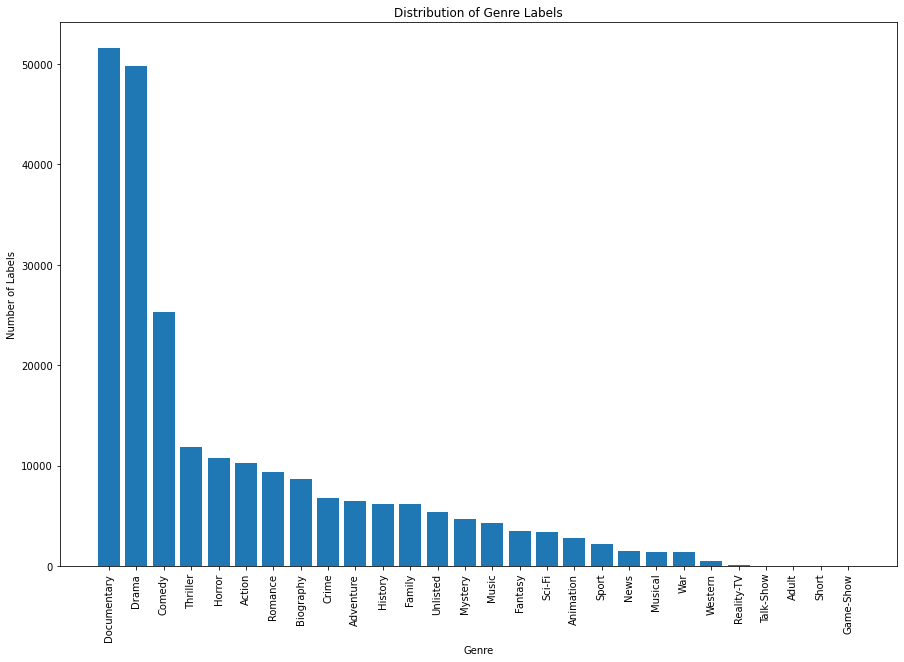

In [285]:
plt.figure(figsize=(15,10))
plt.bar(x_val, y_val)
plt.title('Distribution of Genre Labels')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Labels')